In [21]:
#Dependencies and Setup

import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as st 
import matplotlib.ticker as ticker
import numpy as np

#Import the CSVs

country_path = "archive/co2_emissions_kt_by_country.csv"
population_path = "archive/population_by_country.csv"

country_data = pd.read_csv(country_path)
population_data = pd.read_csv(population_path)

country_data.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [22]:
population = population_data.sort_values(["country_code"])
population.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,54608.0
33,ABW,Aruba,1993,72360.0
34,ABW,Aruba,1994,74710.0
35,ABW,Aruba,1995,77050.0
36,ABW,Aruba,1996,79417.0


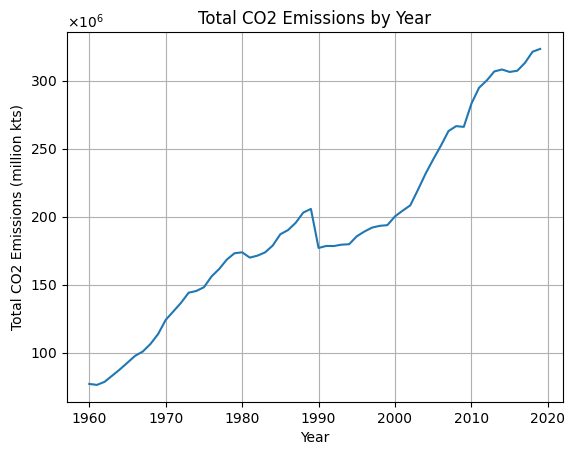

In [23]:
total_country_emissions_per_year = country_data.groupby("year")["value"].sum()
total_country_emissions_per_year

#Creating a line plot to visulize the total data set grouped by year

country_x_axis = total_country_emissions_per_year.index
country_y_axis = total_country_emissions_per_year.values

plt.plot(country_x_axis,country_y_axis)
plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions (million kts)")
plt.title("Total CO2 Emissions by Year")
plt.grid('on', which='major', axis='both')
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText= True)
plt.show()

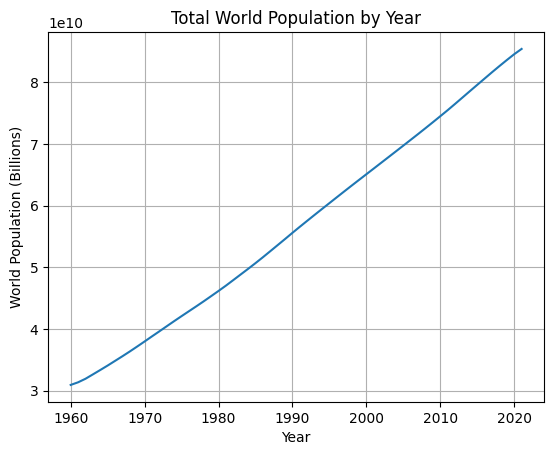

In [24]:
population_by_year = population_data.groupby("year")["value"].sum()
population_by_year

#Creating a line plot to visulize the total data set grouped by year

pop_x_axis = population_by_year.index
pop_y_axis = population_by_year.values

plt.plot(pop_x_axis,pop_y_axis)

plt.xlabel("Year")
plt.ylabel("World Population (Billions)")
plt.title("Total World Population by Year")
plt.grid('on', which='major', axis='both')
plt.show()

In [25]:
#merge the dfs to create a new one 
country_results_merged_df = pd.merge(population_data, country_data, how = "left", on = ["country_code", "year", "country_name"])

#rename the columns
country_results_merged_df.rename(columns = 
    {
    "value_x": "population",
    "value_y": "emissions (kt)"
    }, inplace = True)

country_results_merged_df.head()


,country_code,country_name,year,population,emissions (kt)
0,ABW,Aruba,1960,54608.0,11092.675
1,ABW,Aruba,1961,55811.0,11576.719
2,ABW,Aruba,1962,56682.0,12713.489
3,ABW,Aruba,1963,57475.0,12178.107
4,ABW,Aruba,1964,58178.0,11840.743


In [26]:
#Getting rid of all NaN columns
print(country_results_merged_df[country_results_merged_df.isnull().any(axis=1)])

country_results_merged_df = country_results_merged_df.dropna(how = "any")

country_results_merged_df.head()

      country_code country_name  year  population  emissions (kt)
57             ABW        Aruba  2017    105439.0             NaN
58             ABW        Aruba  2018    105962.0             NaN
59             ABW        Aruba  2019    106442.0             NaN
60             ABW        Aruba  2020    106585.0             NaN
61             ABW        Aruba  2021    106537.0             NaN
...            ...          ...   ...         ...             ...
16339          ZWE     Zimbabwe  1961   3925952.0             NaN
16340          ZWE     Zimbabwe  1962   4049778.0             NaN
16341          ZWE     Zimbabwe  1963   4177931.0             NaN
16398          ZWE     Zimbabwe  2020  15669666.0             NaN
16399          ZWE     Zimbabwe  2021  15993524.0             NaN

[2477 rows x 5 columns]


,country_code,country_name,year,population,emissions (kt)
0,ABW,Aruba,1960,54608.0,11092.675
1,ABW,Aruba,1961,55811.0,11576.719
2,ABW,Aruba,1962,56682.0,12713.489
3,ABW,Aruba,1963,57475.0,12178.107
4,ABW,Aruba,1964,58178.0,11840.743


In [27]:
country_results_merged_df['emissions (tons)'] = country_results_merged_df['emissions (kt)'] * 1000
country_results_merged_df.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons)
0,ABW,Aruba,1960,54608.0,11092.675,11092675.0
1,ABW,Aruba,1961,55811.0,11576.719,11576719.0
2,ABW,Aruba,1962,56682.0,12713.489,12713489.0
3,ABW,Aruba,1963,57475.0,12178.107,12178107.0
4,ABW,Aruba,1964,58178.0,11840.743,11840743.0


In [28]:
country_results_merged_df['emissions per capita (t)'] = country_results_merged_df['emissions (tons)'] / country_results_merged_df['population']
country_results_merged_df.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
0,ABW,Aruba,1960,54608.0,11092.675,11092675.0,203.132783
1,ABW,Aruba,1961,55811.0,11576.719,11576719.0,207.427192
2,ABW,Aruba,1962,56682.0,12713.489,12713489.0,224.294997
3,ABW,Aruba,1963,57475.0,12178.107,12178107.0,211.885289
4,ABW,Aruba,1964,58178.0,11840.743,11840743.0,203.526127


# formatting turns everything into strings

In [29]:
#Formatting the columns 

#country_results_merged_df["population"] = country_results_merged_df["population"].map("{:,.0f}".format)

#country_results_merged_df["emissions (kt)"] = country_results_merged_df["emissions (kt)"].map("{:,.4f}".format)

#country_results_merged_df["emissions per capita (t)"] = country_results_merged_df["emissions per capita (t)"].map("{:,.4f}".format)

#Resets the index since we drop columns
country_results_merged_df.reset_index(drop = True)

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
0,ABW,Aruba,1960,54608.0,11092.675000,1.109268e+07,203.132783
1,ABW,Aruba,1961,55811.0,11576.719000,1.157672e+07,207.427192
2,ABW,Aruba,1962,56682.0,12713.489000,1.271349e+07,224.294997
3,ABW,Aruba,1963,57475.0,12178.107000,1.217811e+07,211.885289
4,ABW,Aruba,1964,58178.0,11840.743000,1.184074e+07,203.526127
...,...,...,...,...,...,...,...
13918,ZWE,Zimbabwe,2015,14154937.0,12430.000305,1.243000e+07,0.878139
13919,ZWE,Zimbabwe,2016,14452704.0,11020.000458,1.102000e+07,0.762487
13920,ZWE,Zimbabwe,2017,14751101.0,10340.000153,1.034000e+07,0.700965
13921,ZWE,Zimbabwe,2018,15052184.0,12380.000114,1.238000e+07,0.822472


In [30]:
sorted_df = country_results_merged_df.sort_values("emissions per capita (t)", ascending=True)
sorted_df.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
12750,SEN,Senegal,1968,4117659.0,-80.674,-80674.0,-0.019592
14641,TLS,Timor-Leste,1999,866649.0,0.000,0.0,0.000000
9770,MLI,Mali,1996,10131906.0,0.000,0.0,0.000000
14643,TLS,Timor-Leste,2001,893001.0,0.000,0.0,0.000000
14642,TLS,Timor-Leste,2000,878360.0,0.000,0.0,0.000000


In [31]:
sorted2019 = sorted_df.loc[sorted_df["year"] == 2019]
sorted2019_ascending = sorted2019.sort_values("emissions per capita (t)", ascending=False)
sorted2019_ascending.drop([5949,12243], axis =0, inplace= True)
sorted2019_ascending.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
12367,QAT,Qatar,2019,2807235.0,91970.001221,9.197000e+07,32.761775
1423,BHR,Bahrain,2019,1494188.0,33259.998322,3.326000e+07,22.259581
7871,KWT,Kuwait,2019,4441100.0,92650.001526,9.265000e+07,20.861949
555,ARE,United Arab Emirates,2019,9211657.0,188860.000610,1.888600e+08,20.502283
11281,OMN,Oman,2019,4602768.0,76029.998779,7.603000e+07,16.518321


country_name
Burundi        0.060632
Czechia        9.022786
Japan          8.540980
Kenya          0.437279
Netherlands    8.437075
Rwanda         0.103623
Name: emissions per capita (t), dtype: float64


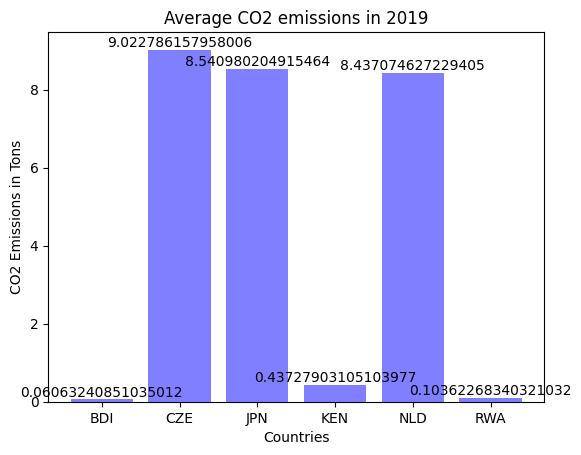

In [32]:
countries_wewant = ['BDI', 'CZE', 'JPN', 'KEN', 'NLD', 'RWA']

countriesofinterest = sorted2019.loc[sorted2019['country_code'].isin(countries_wewant)]
countries2019 = countriesofinterest.groupby(['country_name'])['emissions per capita (t)'].mean()
print(countries2019)

emissions_xaxis = countries_wewant
emissions_yaxis = countries2019
plt.bar(emissions_xaxis, emissions_yaxis, color='b', alpha=0.5, align='center')

for i, v in enumerate(emissions_yaxis):
    plt.text(i, v, str(v), ha='center', va='bottom')



plt.title('Average CO2 emissions in 2019')
plt.xlabel('Countries')
plt.ylabel('CO2 Emissions in Tons')

plt.show()



In [33]:
# Define a function to create a bar vs line plot with a common x axis
def bar_v_line(df_mapping, y_axis_right):

    # First plot, left hand side
    fig, ax1 = plt.subplots(figsize=(8,5))
    ax1.bar(df_mapping["year"], df_mapping["population"], color='blue', alpha = 0.3)
    ax1.set_xlabel("Year")
    ax1.set_ylabel('Population (million)', color='blue')
    
    # # Second plot, right hand side
    ax2 = ax1.twinx()
    ax2.plot(df_mapping['year'], df_mapping[y_axis_right], color='red')
    ax2.set_ylabel(y_axis_right.capitalize(), color = "red")

    ticks = ax1.get_yticks()/1000000
    ax1.set_yticklabels(ticks)

    plt.title(df_mapping["country_name"].iloc[0])
    plt.show()

C:\Users\blake\AppData\Local\Temp\ipykernel_13384\1507917808.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ticks)


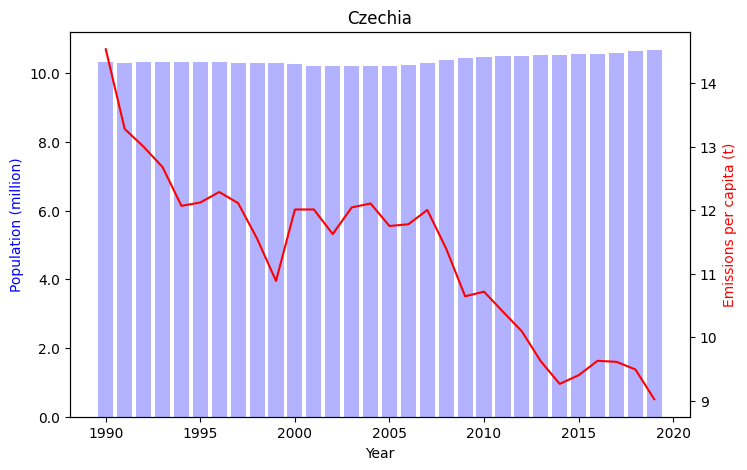

In [34]:
# # Single country df
czechia_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Czechia']
bar_v_line(czechia_data, "emissions per capita (t)")

C:\Users\blake\AppData\Local\Temp\ipykernel_13384\1507917808.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ticks)


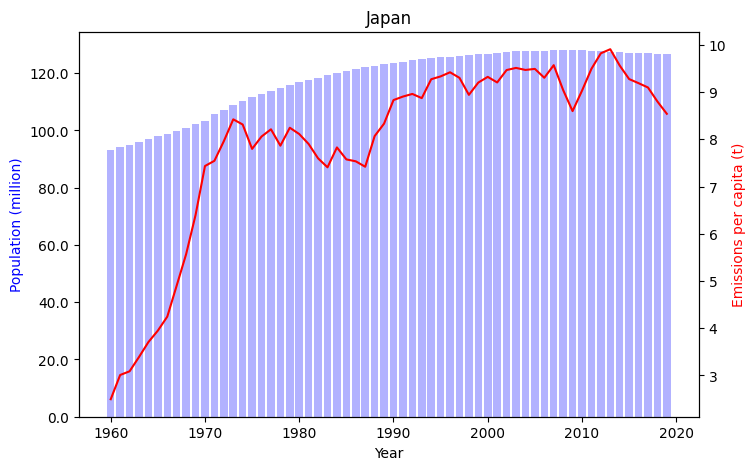

In [35]:
# # Single country df
japan_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Japan']

bar_v_line(japan_data, "emissions per capita (t)")


C:\Users\blake\AppData\Local\Temp\ipykernel_13384\1507917808.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ticks)


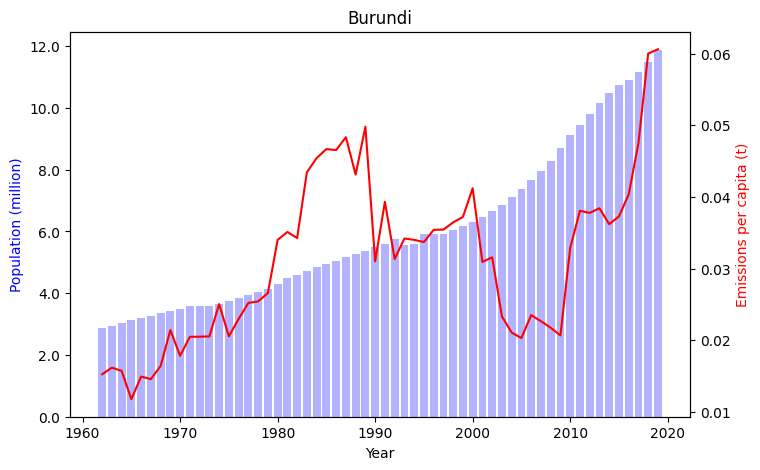

In [36]:
# # Single country df
burundi_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Burundi']

bar_v_line(burundi_data, "emissions per capita (t)")

C:\Users\blake\AppData\Local\Temp\ipykernel_13384\1507917808.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ticks)


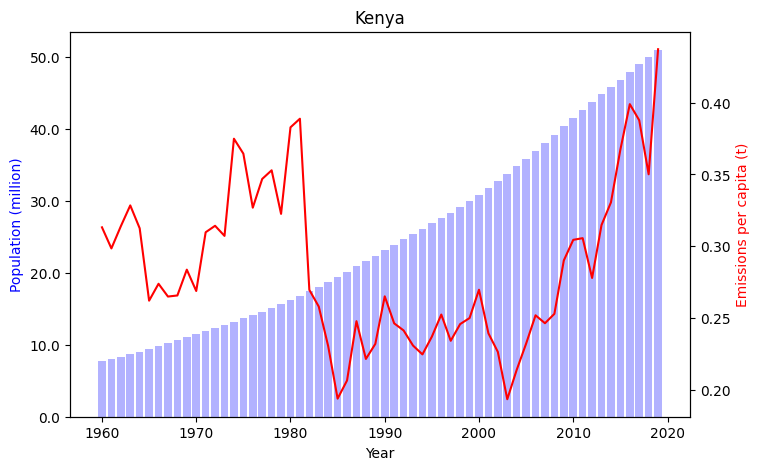

In [37]:
# # Single country df
kenya_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Kenya']

bar_v_line(kenya_data, "emissions per capita (t)")


C:\Users\blake\AppData\Local\Temp\ipykernel_13384\1507917808.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ticks)


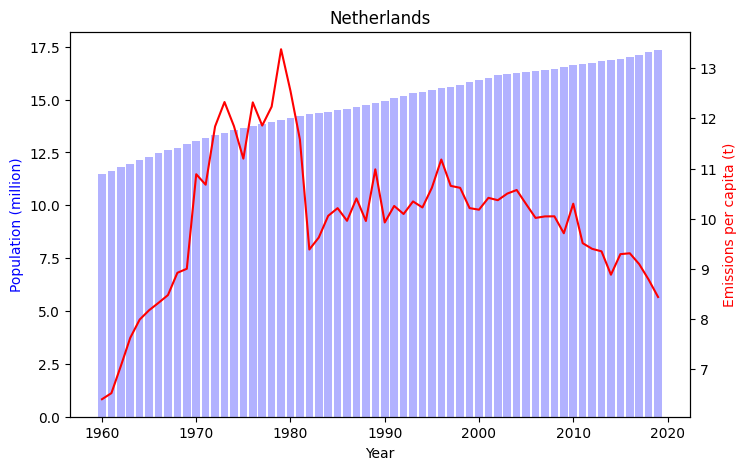

In [38]:
# # Single country df
netherlands_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Netherlands']

bar_v_line(netherlands_data, "emissions per capita (t)")

C:\Users\blake\AppData\Local\Temp\ipykernel_13384\1507917808.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ticks)


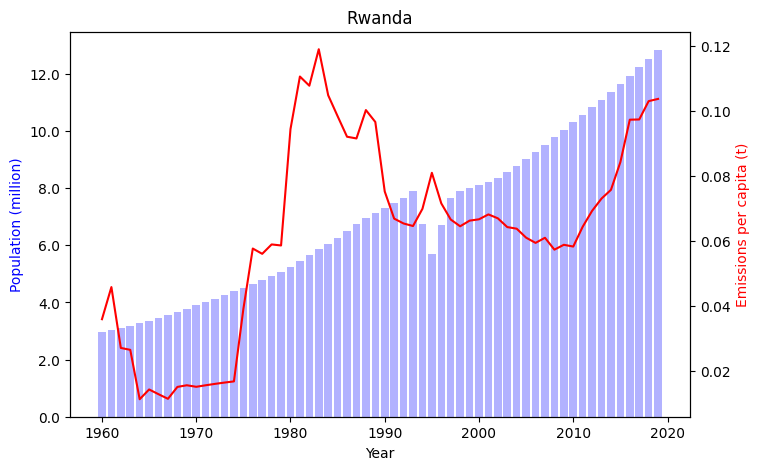

In [39]:
# Single country df
rwanda_data = country_results_merged_df.loc[country_results_merged_df['country_name'] == 'Rwanda']

bar_v_line(rwanda_data, "emissions per capita (t)")

In [40]:
samples_df = pd.read_csv("samples.csv", delimiter=';', names=['GEMS Station #', 'Date of Sample', 'Time of Sample', 'Depth of Sample',
                                                              'Parameter Tested', 'Analysis Method', 'Value Flags', 'Result', 'Unit', 'Data Quality'])
samples_df['Country Code'] = samples_df['GEMS Station #'].str[:3]
samples_df['GEMS #'] = samples_df['GEMS Station #'].str[3:]

samples_columns = samples_df.drop(['GEMS Station #', 'Value Flags', 'Data Quality'], axis=1)
samples_columns.head()

FileNotFoundError: [Errno 2] No such file or directory: 'samples.csv'

In [ ]:
ph_columns = samples_columns.loc[samples_columns['Parameter Tested'] == 'pH']
ph_columns.head()

In [ ]:
countries = ph_columns['Country Code'].unique()
average_ph = ph_columns.groupby(['Country Code'])['Result'].mean().round(2)
print(average_ph)

# print(countries)
# print(average_ph)

plt.bar(countries, average_ph, color='b', alpha=0.5, align="center")

for i, v in enumerate(average_ph):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('pH by Country')
plt.xlabel('Country Code')
plt.ylabel('Average pH of the Country')
plt.show()

In [ ]:
samples_pollutants = samples_columns.loc[samples_columns['Parameter Tested'] != 'pH']
samples_pollutants.head()

In [ ]:
average_pollutants = samples_pollutants.groupby(['Country Code'])['Result'].mean()
average_pollutants_df = pd.DataFrame(average_pollutants)
print(average_pollutants_df)

remove_nld = average_pollutants_df[average_pollutants_df.index != 'NLD']
print(remove_nld)


In [ ]:
pol_yaxis_values = remove_nld['Result'].values
pol_yaxis = pol_yaxis_values.round(2)
pol_xaxis = remove_nld.index.to_list()
print(pol_xaxis)
print(pol_yaxis)

plt.bar(pol_xaxis, pol_yaxis, color='r', alpha=0.5, align="center")

for i, v in enumerate(pol_yaxis):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Country Code')
plt.ylabel('Amount of Pollutants')
plt.title('Pollutants Per Country')

plt.show()

In [ ]:
nld_poll = average_pollutants_df[average_pollutants_df.index == 'NLD']

nld_xaxis = nld_poll.index.to_list()
nld_yaxis = nld_poll['Result'].round(2)

for i, v in enumerate(nld_yaxis):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Country Code')
plt.ylabel('Amount of Pollutants')
plt.title('Pollutants in the Netherlands')

plt.bar(nld_xaxis, nld_yaxis, color='r', alpha=0.5, align='center')
plt.show()

In [ ]:
labels_pol = ["All Other Countries", "All Other Countries", "All Other Countries", "All Other Countries", "Netherlands", "All Other Countries"]
colors_pol = ["lightskyblue", "lightcoral", "blue", "lightgreen", "red", "purple"]
plt.pie(average_pollutants, labels=labels_pol, colors=colors_pol, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show

In [ ]:
# labels_polnonld = remove_nld.index.values
# print(labels_polnonld)
labels_polnonld_names = ["Burundi", "Czechia", "Japan", "Kenya", "Rawanda"]
colors_pol = ["lightskyblue", "lightcoral", "blue", "lightgreen", "purple"]
pol_nonld = remove_nld["Result"]
plt.pie(pol_nonld, labels=labels_polnonld_names, colors=colors_pol, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show

In [ ]:
no_nld = average_pollutants[average_pollutants.index != 'NLD']

average_poll_quartiles = [no_nld]
# average_poll_quartiles

fig1, ax1 = plt.subplots()
ax1.set_title('Average Pollutants Per Country - No Netherlands')
ax1.set_ylabel('Average # Pollutants')
ax1.boxplot(average_poll_quartiles)
plt.show()

In [ ]:
average_poll_quart = [average_pollutants]
# average_poll_quartiles

fig1, ax1 = plt.subplots()
ax1.set_title('Average Pollutants Per Country - With Netherlands')
ax1.set_ylabel('Average # Pollutants')
ax1.boxplot(average_poll_quart)
plt.show()

In [ ]:
quartiles_poll = average_pollutants.quantile([.25,.5,.75])
lowerq_poll = quartiles_poll[0.25]
upperq_poll = quartiles_poll[0.75]
iqr_poll = upperq_poll - lowerq_poll
print(f"The lower quartile of Pollutants is: {lowerq_poll}")
print(f"The upper quartile of Pollutants is: {upperq_poll}")
print(f"The interquartile range of pollutants overall is: {iqr_poll}")
print(f"The median pollutants is: {quartiles_poll[0.5]}")

lower_bound_poll = lowerq_poll - (1.5 * iqr_poll)
upper_bound_poll = upperq_poll + (1.5 * iqr_poll)
print(f"Values below {lower_bound_poll} could be outliers.")
print(f"Values above {upper_bound_poll} could be outliers.")

In [ ]:
quartiles_emis = countries2019.quantile([.25,.5,.75])
lowerq_emis = quartiles_emis[0.25]
upperq_emis = quartiles_emis[0.75]
iqr_emis = upperq_emis - lowerq_emis
print(f"The lower quartile of Emissions is: {lowerq_emis}")
print(f"The upper quartile of Emissions is: {upperq_emis}")
print(f"The interquartile range of Emissions overall is: {iqr_emis}")
print(f"The median Emissions is: {quartiles_emis[0.5]}")

lower_bound_emis = lowerq_emis - (1.5 * iqr_emis)
upper_bound_emis = upperq_emis + (1.5 * iqr_emis)
print(f"Values below {lower_bound_emis} could be outliers.")
print(f"Values above {upper_bound_emis} could be outliers.")

In [ ]:
# take out those outliers on the top that are skewing the data

nld_info = samples_pollutants.loc[samples_pollutants['Country Code'] == 'NLD']
# nld_info
# nld_sorted = nld_info.sort_values('Result')
# nld_sorted['result_floats'] = nld_sorted['Result'].astype(float)

nld_no_outliers = nld_info.loc[nld_info['Result'] < 1000000]
nld_no_outliers

In [ ]:
# new average pollutants w/o nld outliers
samples_no_outliers = samples_pollutants.loc[samples_pollutants['Result'] < 1000000]
samples_no_outliers

In [ ]:
avg_no_outliers = samples_no_outliers.groupby('Country Code')['Result'].mean().round(2)
avg_no_outliers_df = pd.DataFrame(avg_no_outliers)
# avg_no_outliers = avg_no_outliers.rename(columns={avg_no_outliers.columns[1]: 'Results'})
print(avg_no_outliers_df)

# average pollutants, no outliers
x_avgnooutliers = avg_no_outliers_df.index
y_avgnooutliers = avg_no_outliers_df['Result']
plt.bar(x_avgnooutliers, y_avgnooutliers, color='r', alpha=0.5, align='center')

for i,v in enumerate(y_avgnooutliers):
    plt.text(i,v, str(v), ha='center', va='bottom')

plt.title('Pollutants by Country, No Outliers')
plt.xlabel('Country Code')
plt.ylabel('Average Pollutants (No Outliers)')
plt.show()

In [ ]:
# updated box plots pollution
updated_average_poll_quart = [avg_no_outliers]
print(updated_average_poll_quart)

fig1, ax1 = plt.subplots()
ax1.set_title('Average Pollutants - No Outliers')
ax1.set_ylabel('Average # Pollutants - No Outliers')
ax1.boxplot(updated_average_poll_quart)
plt.show()

In [ ]:
# box plot emissions
emissions_average_quart = [countries2019]
print(average_poll_quartiles)

fig1, ax1 = plt.subplots()
ax1.set_title('Average Emissions')
ax1.set_ylabel('Average Emissions')
ax1.boxplot(emissions_average_quart)
plt.show()

In [ ]:
# updated quartiles - pollutants
updated_quartiles_poll = avg_no_outliers.quantile([.25,.5,.75])
updated_lowerq_poll = updated_quartiles_poll[0.25]
updated_upperq_poll = updated_quartiles_poll[0.75]
updated_iqr_pol = updated_upperq_poll - updated_lowerq_poll
print(f"The lower quartile of Pollutants is: {updated_lowerq_poll}")
print(f"The upper quartile of Pollutants is: {updated_upperq_poll}")
print(f"The interquartile range of Pollutants overall is: {updated_iqr_pol}")
print(f"The median Pollutants is: {updated_quartiles_poll[0.5]}")

updated_lower_bound_poll = updated_lowerq_poll - (1.5 * updated_iqr_pol)
updated_upper_bound_poll = updated_upperq_poll + (1.5 * updated_iqr_pol)
print(f"Values below {updated_lower_bound_poll} could be outliers.")
print(f"Values above {updated_upper_bound_poll} could be outliers.")

In [ ]:
# updated quartiles - emissions
quartiles_emis = countries2019.quantile([.25,.5,.75])
lowerq_emis = quartiles_emis[0.25]
upperq_emis = quartiles_emis[0.75]
iqr_emis = upperq_emis - lowerq_emis
print(f"The lower quartile of Emissions is: {lowerq_emis}")
print(f"The upper quartile of Emissions is: {upperq_emis}")
print(f"The interquartile range of Emissions overall is: {iqr_emis}")
print(f"The median Emissions is: {quartiles_emis[0.5]}")

lower_bound_emis = lowerq_emis - (1.5 * iqr_emis)
upper_bound_emis = upperq_emis + (1.5 * iqr_emis)
print(f"Values below {lower_bound_emis} could be outliers.")
print(f"Values above {upper_bound_emis} could be outliers.")